Autumn 2021 - Social Graphs and Interactions (02805) - DTU

# Harry Potter and the Graph of Secrets - Final Project

## Table of Contents

* [1. Motivation](#c1)

* [2. Basic statistics](#c2)

* [3. Tools, theory and analysis](#c3)
    * [3.1 Project 1:...](#s3_1)
    * [3.2 Project 2:...](#s3_2)
    * [3.3 Project 3:...](#s3_3)
    * [3.4 Project 4:...](#s3_4)
    * [3.5 Project 5:...](#s3_5)
    * [3.6 Project 6:...](#s3_6)

* [4. Discussion](#c4)

* [5. Contributions](#c5)

* [6. References](#c6)

## 1. Motivation  <a class="anchor" id="c1"></a>

Exploring the ...

## 2. Basic Statistics <a class="anchor" id="c2"></a>

### 2.1 Data Preparation <a class="anchor" id="s_2_1"></a>

#### 2.1.1 Data and Basic Statistics <a class="anchor" id="s_2_1_1"></a>

We start by importing the libaries and the ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('stopwords')
nltk.download('wordnet')
import re
import pickle
from PIL import Image
import chart_studio
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.graph_objs.scatter.marker import Line
from wordcloud import WordCloud, ImageColorGenerator
from Contractions import contractions
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



pyo.init_notebook_mode()
chart_studio.tools.set_credentials_file(username='mmestre', api_key='YbVYpQRqmw3RvNPohYBn')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jakob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jakob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 3. Tools, theory and analysis <a class="anchor" id="c3"></a>

### 3.1 Project 1: WordCloud analysis of houses <a class="anchor" id="s3_1"></a>

#### i. Points of interest

This part is about analysing the different houses of Hogwarts with the use of wordclouds, i.e. we will generate images consisting of words, with the size of the words in the image proportional to the number of times that word appear in the string used to generate the image. Firstly, we want to analyse how the members of the different houses speak and see if there are any patterns/trends there. Secondly, we want to use the characters' wiki-descriptions to look for any trends/differences between the houses.

#### ii. Explain the tool

##### Part a: WordClouds based on character dialogue

For the analysis of the way members of the different houses speak, we will use the movie scripts data. In order to have useful data for this part, we will need to load and prepare the movie data, which can be done in the following steps:

- Step 1: Load the dialogues from all 8 movies into one pandas DataFrame. Each row in this DataFrame is one dialogue, where the movie name is given in one column, the name of the character speaking is given in another column, the chapter name in a third column, and finally the actual dialogue in a the last column.
- Step 2: Change some of the names in the dataframe, as there are a few spelling mistakes, and some characters such as Voldemort are referred to as both Voldemort and Tom Riddle. We want just one name per character.
- Step 3: Add the House of the character, which is done using the data obtained from the Wiki page.
- Step 4: A brief cleaning of the data consisting of removing any character that isn't a letter or an apostrophe, and putting it all in lowercase
- Step 5: Tokenize the dialogue. For this a function is created. This function takes the dialogue input as a string and returns a list of words (tokens). It does so with the use of the NLTK library's lemmatizer and tokenizer. The tokenizer function also splits up contracted words into their base words, and removes stop words as they aren't useful for this.
- Step 6: Combine all the dialogues for each unique character, creating a long list of tokens consisting of every word (apart from the removed stopwords) each character has said throughout the 8 movies.

Once the data has been prepared we can start analysing it using the wordcloud library. One way to do this is to simply combine all tokens of characters belonging to one house, convert them into one string, and then use that string to generate the wordcloud. While this should provide a decent representation, there is a better way to do it, that is, using the tc-idf score of the words. The tc-idf score of a word is the product of its term count and the inverse document frequency, where term count is the number of times that word appears in a document (in our case a charater's complete dialogue) and the inverse document frequency is the log of the total number of documents divided by the number of documents in which the word appears. Using the tc-idf ensures that words which don't appear often have a greater importance, meaning the more unique words said by characters will be weighted more, hence the differences should be more noticeable using this method.

We will use both methods and compared the results. We will first create the wordclouds simply based on the characters' pure dialogue for each house where the steps are as follows:

- Step 7: Combine all characters of the same house
- Step 8: Create a wordcloud for each house to get the wordclouds based on the characters' pure dialogue.

We will then create the wordclouds based on the words' tc-idf scores, where the steps are as follows:

- Step 9: Calculate the term count (tc) of each word. Here we will use the dataframe created in Step 6, the one containing each character's complete dialogue. We will count the number of times a word occurs in each character's complete dialogue, and store it in a dataframe.
- Step 10: Calculate the inverse document frequency (idf).
- Step 11: Calculate tc-idf.
- Step 12: Combine all characters of the same house.
- Step 13: Convert the tc-idf scores of the words to a string of words. The string is made by adding a word x times to the string, where x is the tc-idf score of said word converted to the nearest integer.
- Step 14: Create the wordclouds.

##### Part b: WordcCouds based on character wiki-pages

For the analysis of the characters' wiki-pages, we will use the DataFrame created from the Harry Potter wiki pages. We will again need to prepare this data, however as most of this has already been done, this part is fairly short and just about loading the right data. The steps are as follow:

- Step 1: Load the DataFrame using pickle
- Step 2: Add the characters' wiki-pages descriptions. As these have already been downloaded and saved as files in the folder 'Description_extract', we simply need to add these files to the DataFrame. We also need to remove stopwords and lemmatize the extract, which is also done in this step.
- Step MAYBE: Prepare the data some more???
- Step MAYBE: Remove characters who don't belong to any house

Now that our data has been prepared, we will again create WordClouds based on both the pure character descriptions, and the tc-idf scores of the words. We will start with the pure descriptions, where the steps are as follows:

- Step 3: Combine characters of the same house.
- Step 4: Create the WordClouds

We will now create the WordClouds based on the tc-idf scores in a similar fashion as in part a. The steps are as follows:

- Step 5: Calculate the term count (tc) of each word. We will count the number of times a word occurs in each character's wiki description, and store it in a dataframe.
- Step 6: Calculate the inverse document frequency (idf).
- Step 7: Calculate tc-idf.
- Step 8: Combine all characters of the same house.
- Step 9: Convert the tc-idf scores of the words to a string of words. The string is made by adding a word x times to the string, where x is the tc-idf score of said word converted to the nearest integer.
- Step 10: Create the wordclouds.

#### iii. Applying the tool

##### Part a: WordClouds based on character dialogue

In this section we will follow the steps described in the previous section.

In [2]:
# Function to create tokens (list of words)
def to_tokens(text):
    
    # Init the Wordnet Lemmatizer and get stop words
    lemmatizer = WordNetLemmatizer()
    tk = WordPunctTokenizer()
    stop_words = set(stopwords.words('english')) 
    
    tokens = []
    for word in text.split():
        if word.lower() in contractions:
            # Add contracted word(s) if it contains an apostrophe
            contracted_words = contractions[word.lower()]
            for x in contracted_words.split():
                tokens.append(x)
        else:
            tokens.append(word)
    # Remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens if (not w in stop_words) and (w.isalnum())]
    return tokens

In [3]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other df_script and get house data
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)

# Step 5: Create tokens
df_script['tokens'] = df_script["clean"].apply(lambda x: to_tokens(x))

df_script.head()

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  \
0  Gryffindors  i should have known that you would be here pro...         64   
1  Gryffindors  good evening professor dumbledore are the rumo...         61   
2  Gryffindors      i'm afraid so professor the good and the bad          45   
3  Gryffindors                                       and the boy          12   
4  Gryffindors                            hagrid is bringing him          23   

                                              tokens  
0              [known, would, professor, mcgonagall]  
1  [good, evening, professor, dumbledore, rumour,...  
2                     [afraid, professor, good, bad]  
3                                              [boy]  
4                                 [hagrid, bringing]

In [4]:
# Step 6: Combine all the dialogues for each unique character

# Function to combine the dialogue for each character
def combine_lists(name):
    x = list(df_script.groupby(['character']).get_group(name)['tokens'])
    flat_list = [item for sublist in x for item in sublist]
    return flat_list

# Create a new dataframe with one row per character
df_temp = pd.DataFrame(sorted(list(df_script.character.unique())), columns =['character'])
df_characters = pd.merge(df_temp, df_house, on="character", how='left')

# Add all the tokens of each characters
df_characters['tokens'] = df_characters['character'].apply(lambda x: combine_lists(x))

# Add the lengths of the tokens
df_characters['token_lengths'] = df_characters['tokens'].apply(lambda x: len(x))

##  Remove the characters who say less than 50 words
#df_characters = df_characters.drop(df_characters[df_characters.token_lengths < 50].index)
#df_characters = df_characters.reset_index(drop=True)

df_characters.head()

character        House  \
0  Aberforth Dumbledore      Unknown   
1         Alastor Moody      Unknown   
2      Albus Dumbledore  Gryffindors   
3          Albus Potter   Slytherins   
4         Alecto Carrow   Slytherins   

                                              tokens  token_lengths  
0  [potter, bloody, fool, thinking, coming, idea,...            109  
1  [stupid, roof, alastor, moody, ministry, malco...            570  
2  [known, would, professor, mcgonagall, afraid, ...           3635  
3  [really, thestrals, pulling, carriage, dad, pu...             10  
4  [put, smile, miss, reynolds, would, want, pay,...             10

In [5]:
# Step 7: Combine characters' dialogue by house

# Split dataframe by House
df_groups = df_characters.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_list = [item for sublist in list(df_groups.get_group('Gryffindors')["tokens"]) for item in sublist]
Ravenclaw_list = [item for sublist in list(df_groups.get_group('Ravenclaws')["tokens"]) for item in sublist]
Slytherin_list = [item for sublist in list(df_groups.get_group('Slytherins')["tokens"]) for item in sublist]
Hufflepuff_list = [item for sublist in list(df_groups.get_group('Hufflepuffs')["tokens"]) for item in sublist]
#Unknown_list = [item for sublist in list(df_groups.get_group('Unknown')["tokens"]) for item in sublist]

all_sentences = []
for x in [Gryffindor_list, Ravenclaw_list, Slytherin_list, Hufflepuff_list]:
    all_sentences.append(" ".join(x))

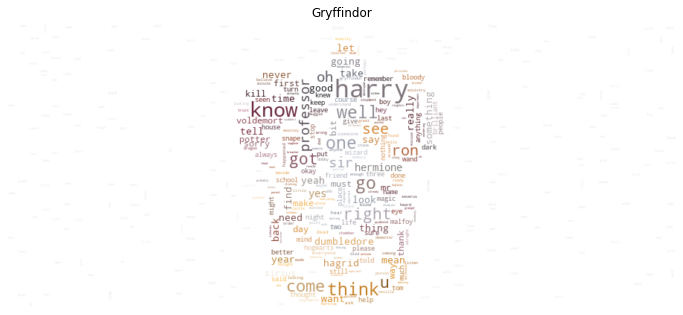

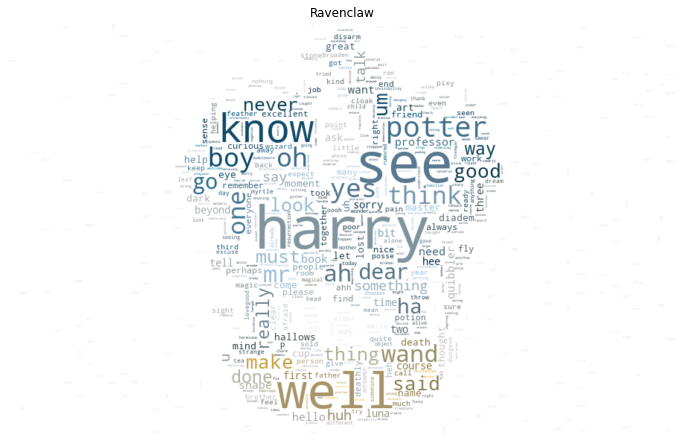

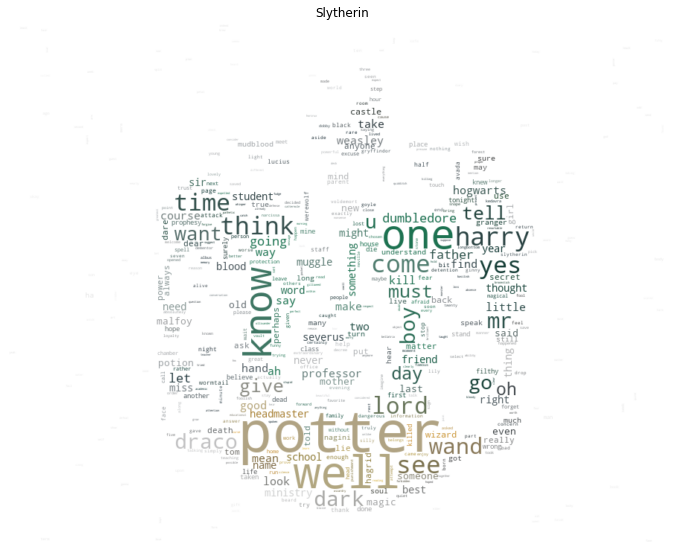

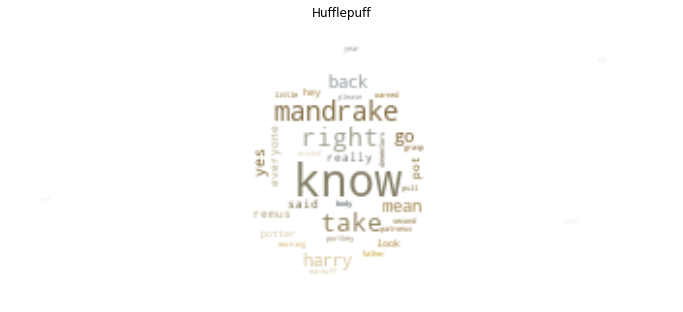

In [6]:
# Step 8: Create a wordcloud for each house to get the wordclouds based on the characters' pure dialogue

# Wordclouds based on the pure characters dialogue (no tc-idf)
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(all_sentences[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title(houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

In [7]:
# Step 9: Calculate term count

vocabulary = set(df_characters['tokens'].explode())
temp_tc = []

# Loop through all characters
for index, row in df_characters.iterrows():
    
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(vocabulary,0)
    for word in row['tokens']:
        if word in vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['character']]))

# Create dataframe
tc = pd.concat(temp_tc,axis=1)
tc.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  \
NaN                             0              0                 0   
flame                           0              0                 2   
vipera                          0              0                 0   
obituary                        0              0                 0   
appropriate                     0              0                 1   

             Albus Potter  Alecto Carrow  All  Amos Diggory  Angelina Johnson  \
NaN                     0              0    0             0                 0   
flame                   0              0    0             0                 0   
vipera                  0              0    0             0                 0   
obituary                0              0    0             0                 0   
appropriate             0              0    0             0                 0   

             Announcer  Arabella Figg  ...  Waitress  Wakanda  Walburga Black  \
NaN                  0              0  ...         0        0               0   
flame                0              0  ...         0        0               0   
vipera               0              0  ...         0        0               0   
obituary             0              0  ...         0        0               0   
appropriate          0              0  ...         0        0               0   

             Whomping Willow  William Weasley  Witch  Wizard  Woman  \
NaN                        0                0      0       0      0   
flame                      0                0      0       0      0   
vipera                     0                0      0       0      0   
obituary                   0                0      0       0      0   
appropriate                0                0      0       0      0   

             Xenophilius Lovegood  Zacharias Smith  
NaN                             0                0  
flame                           0                0  
vipera                          0                0  
obituary                        0                0  
appropriate                     0                0  

[5 rows x 167 columns]

In [8]:
# Step 10: Calculate inverse document frequency

temp_idf=[]
for element in tc.to_numpy():
    temp_idf.append(np.log (len(df_characters)/(1+len(np.where(element > 0)[0]))))
idf = pd.DataFrame(temp_idf, index=vocabulary, columns=['idf'])
idf.head()

idf
NaN          5.117994
flame        4.019382
vipera       4.424847
obituary     4.424847
appropriate  4.424847

In [9]:
# Step 11: Calculate tc-idf score per character

tc_idf = pd.concat([tc,idf],axis=1)
for columns in tc_idf.columns[:-1]:
    tc_idf[columns] = tc_idf[columns]*tc_idf['idf']
tc_idf.drop(columns='idf',inplace=True)
tc_idf.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  \
NaN                           0.0            0.0          0.000000   
flame                         0.0            0.0          8.038763   
vipera                        0.0            0.0          0.000000   
obituary                      0.0            0.0          0.000000   
appropriate                   0.0            0.0          4.424847   

             Albus Potter  Alecto Carrow  All  Amos Diggory  Angelina Johnson  \
NaN                   0.0            0.0  0.0           0.0               0.0   
flame                 0.0            0.0  0.0           0.0               0.0   
vipera                0.0            0.0  0.0           0.0               0.0   
obituary              0.0            0.0  0.0           0.0               0.0   
appropriate           0.0            0.0  0.0           0.0               0.0   

             Announcer  Arabella Figg  ...  Waitress  Wakanda  Walburga Black  \
NaN                0.0            0.0  ...       0.0      0.0             0.0   
flame              0.0            0.0  ...       0.0      0.0             0.0   
vipera             0.0            0.0  ...       0.0      0.0             0.0   
obituary           0.0            0.0  ...       0.0      0.0             0.0   
appropriate        0.0            0.0  ...       0.0      0.0             0.0   

             Whomping Willow  William Weasley  Witch  Wizard  Woman  \
NaN                      0.0              0.0    0.0     0.0    0.0   
flame                    0.0              0.0    0.0     0.0    0.0   
vipera                   0.0              0.0    0.0     0.0    0.0   
obituary                 0.0              0.0    0.0     0.0    0.0   
appropriate              0.0              0.0    0.0     0.0    0.0   

             Xenophilius Lovegood  Zacharias Smith  
NaN                           0.0              0.0  
flame                         0.0              0.0  
vipera                        0.0              0.0  
obituary                      0.0              0.0  
appropriate                   0.0              0.0  

[5 rows x 167 columns]

In [10]:
# Step 12: Add all tc-idf scores for characters of the same house up

Gryffindor_list = list(df_characters[df_characters.House == 'Gryffindors']['character'])
Ravenclaw_list = list(df_characters[df_characters.House == 'Ravenclaws']['character'])
Slytherin_list = list(df_characters[df_characters.House == 'Slytherins']['character'])
Hufflepuff_list = list(df_characters[df_characters.House == 'Hufflepuffs']['character'])

tc_idf['Gryffindor'] = tc_idf[Gryffindor_list].sum(axis=1)
tc_idf['Ravenclaw'] = tc_idf[Ravenclaw_list].sum(axis=1)
tc_idf['Slytherin'] = tc_idf[Slytherin_list].sum(axis=1)
tc_idf['Hufflepuff'] = tc_idf[Hufflepuff_list].sum(axis=1)
tc_idf.head()

Aberforth Dumbledore  Alastor Moody  Albus Dumbledore  \
NaN                           0.0            0.0          0.000000   
flame                         0.0            0.0          8.038763   
vipera                        0.0            0.0          0.000000   
obituary                      0.0            0.0          0.000000   
appropriate                   0.0            0.0          4.424847   

             Albus Potter  Alecto Carrow  All  Amos Diggory  Angelina Johnson  \
NaN                   0.0            0.0  0.0           0.0               0.0   
flame                 0.0            0.0  0.0           0.0               0.0   
vipera                0.0            0.0  0.0           0.0               0.0   
obituary              0.0            0.0  0.0           0.0               0.0   
appropriate           0.0            0.0  0.0           0.0               0.0   

             Announcer  Arabella Figg  ...  William Weasley  Witch  Wizard  \
NaN                0.0            0.0  ...              0.0    0.0     0.0   
flame              0.0            0.0  ...              0.0    0.0     0.0   
vipera             0.0            0.0  ...              0.0    0.0     0.0   
obituary           0.0            0.0  ...              0.0    0.0     0.0   
appropriate        0.0            0.0  ...              0.0    0.0     0.0   

             Woman  Xenophilius Lovegood  Zacharias Smith  Gryffindor  \
NaN            0.0                   0.0              0.0    0.000000   
flame          0.0                   0.0              0.0   12.058145   
vipera         0.0                   0.0              0.0    0.000000   
obituary       0.0                   0.0              0.0    0.000000   
appropriate    0.0                   0.0              0.0    4.424847   

             Ravenclaw  Slytherin  Hufflepuff  
NaN                0.0   0.000000         0.0  
flame              0.0   0.000000         0.0  
vipera             0.0   4.424847         0.0  
obituary           0.0   0.000000         0.0  
appropriate        0.0   0.000000         0.0  

[5 rows x 171 columns]

In [11]:
# Step 13: Convert tc-idf scores to a string of words relative to the scores

houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_tcidf = tc_idf[houses]
houses_descriptions = [""]*len(houses)

for i in range(len(houses)):
    
    # Create list of words by their tc-idf scores
    words = []
    for word in vocabulary:
        count = int(houses_tcidf[houses[i]][word])
        words = words + [word]*count
        
    # Convert list to a string
    houses_descriptions[i] = " ".join(words)

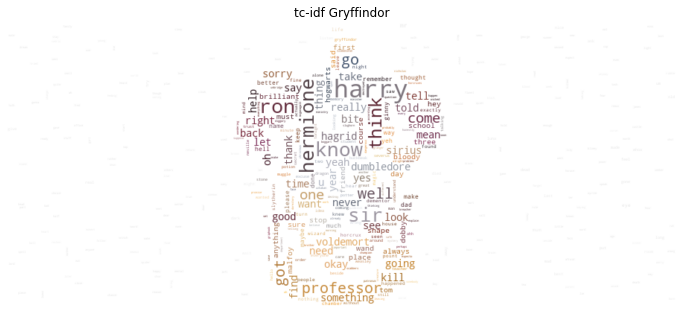

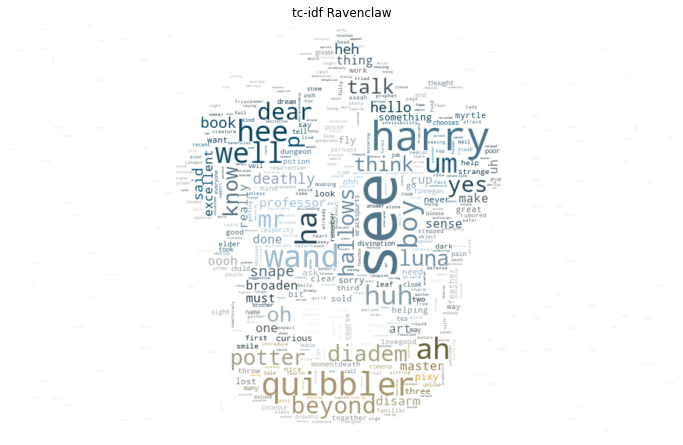

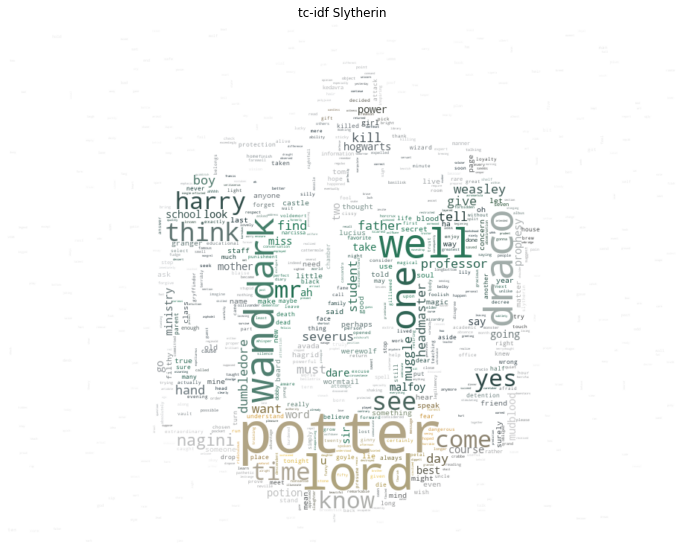

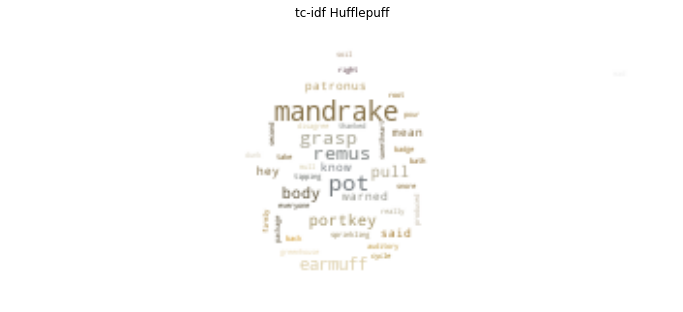

In [12]:
# Step 14: Wordclouds based on the tc-idf scores

for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_descriptions[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title('tc-idf ' + houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

##### Part b: WordClouds based on character wiki-pages

We will again follow the steps from the previous section

In [13]:
# Step 1: Load the DataFrame
with open(r"pickle_network_prep.txt", "rb") as fp:
    df_all = pickle.load(fp)

In [14]:
# Step 2: Add the character description files to the DataFrame

tk = WordPunctTokenizer()
names_list = [n.lower() for n in df_all.Name]
stop_words = set(stopwords.words('english'))
page_path = "Description_extract/"
lemmatizer = WordNetLemmatizer()

list_description_extract = []
for index, row in df_all.iterrows():
    with open(page_path+row['Name']+'.txt','r') as f:
        # Remove whitespace characters
        node_description = f.read().replace('\\n', '').replace('\\t', '').replace('"', '')
        
        # Put lower case
        node_description = node_description.lower()
    
        # Remove names
        for name in names_list:
            node_description = re.sub(name+'(?:s*)','', node_description)
        
        # Tokenize and remove stopwords
        node_description = tk.tokenize(node_description)
        node_description = [lemmatizer.lemmatize(w) for w in node_description if (not w in stop_words) and (w.isalnum())]
    list_description_extract.append(node_description)
    
df_all["Description_extract"] = list_description_extract

In [15]:
df_all.head()

Name        House  Gender    Blood Species Nationality  \
0  Euan Abercrombie  Gryffindors    Male  Unknown   Human      GBorIE   
1      Sakura Akagi  Gryffindors  Female  Unknown   Human      GBorIE   
2       Zakir Akram  Gryffindors    Male  Unknown   Human      GBorIE   
3         Nick Alas  Gryffindors    Male  Unknown   Human      GBorIE   
4   Filemina Alchin  Gryffindors  Female  Unknown   Human      GBorIE   

     Heigh   Weight     Hair     Eyes     Skin  \
0  Unknown  Unknown  Unknown  Unknown  Unknown   
1  Unknown  Unknown  Unknown  Unknown  Unknown   
2  Unknown  Unknown  Unknown  Unknown  Unknown   
3  Unknown  Unknown  Unknown  Unknown  Unknown   
4  Unknown  Unknown  Unknown  Unknown  Unknown   

                   Caracters_in_page  \
0                     [Harry Potter]   
1                                 []   
2                                 []   
3                                 []   
4  [Angelina Appleby, Astrix Alixan]   

                                 Description_extract  
0  [wizard, gryffindor, student, hogwarts, school...  
1  [gryffindor, student, hogwarts, school, witchc...  
2  [gryffindor, student, hogwarts, school, witchc...  
3  [wizard, gryffindor, student, hogwarts, school...  
4  [b, 1670s, 80, gryffindor, student, hogwarts, ...

In [16]:
# Step 3: Combine characters' dialogue by house

# Split dataframe by House
df_wiki_groups = df_all.groupby(['House'])

# Combine all dialoges for each House
Gryffindor_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Gryffindors')["Description_extract"]) for item in sublist]
Ravenclaw_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Ravenclaws')["Description_extract"]) for item in sublist]
Slytherin_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Slytherins')["Description_extract"]) for item in sublist]
Hufflepuff_wiki_list = [item for sublist in list(df_wiki_groups.get_group('Hufflepuffs')["Description_extract"]) for item in sublist]
#Unknown_list = [item for sublist in list(df_groups.get_group('Unknown')["tokens"]) for item in sublist]

all_wiki_sentences = []
for x in [Gryffindor_wiki_list, Ravenclaw_wiki_list, Slytherin_wiki_list, Hufflepuff_wiki_list]:
    all_wiki_sentences.append(" ".join(x))

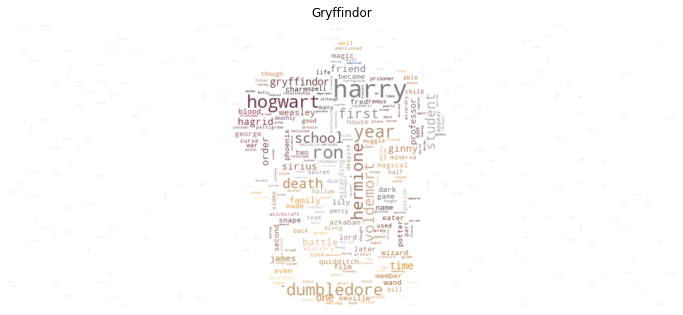

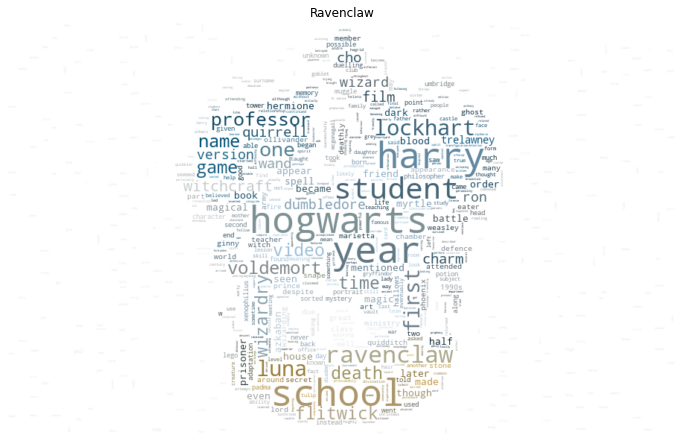

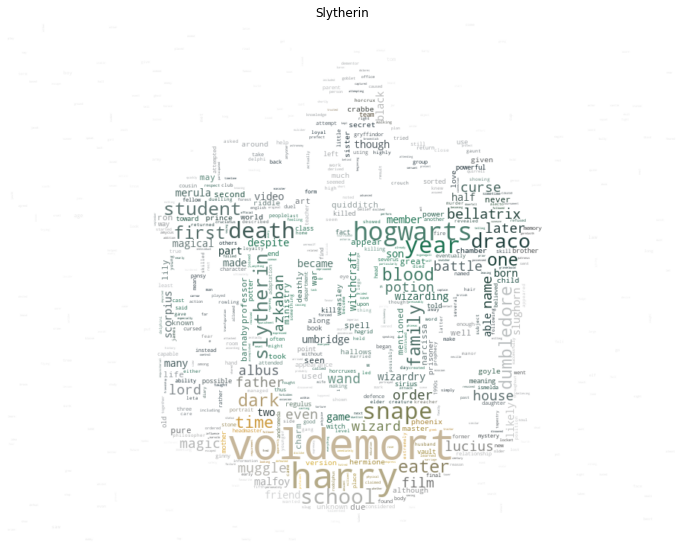

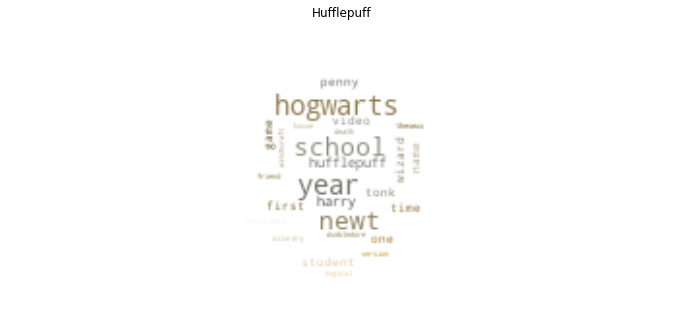

In [17]:
# Step 4: Create a WordCloud for each house to get the wordclouds based on the characters' pure wiki description

# Wordclouds based on the pure characters dialogue (no tc-idf)
houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(all_wiki_sentences[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title(houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

In [18]:
# Step 5: Calculate term count

wiki_vocabulary = set(df_all['Description_extract'].explode())
temp_tc = []

# Loop through all characters
for index, row in df_all.iterrows():
    
    # Create empty frequency table and fill it up
    freq_table = dict.fromkeys(wiki_vocabulary,0)
    for word in row['Description_extract']:
        if word in wiki_vocabulary:
            freq_table[word] += 1
    # Add frequency table to temporary tc
    temp_tc.append(pd.DataFrame.from_dict(freq_table, orient='index',columns=[row['Name']]))

# Create dataframe
wiki_tc = pd.concat(temp_tc,axis=1)
wiki_tc.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                       0             0            0          0   
protruding                   0             0            0          0   
flame                        0             0            0          0   
pince                        0             0            0          1   
breaststroke                 0             0            0          0   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                      0                    0              0   
protruding                  0                    0              0   
flame                       0                    0              0   
pince                       0                    0              0   
breaststroke                0                    0              0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Thomas Vace  \
gaunts                    0            0             0  ...            0   
protruding                0            0             0  ...            0   
flame                     0            0             0  ...            0   
pince                     0            0             0  ...            0   
breaststroke              0            0             0  ...            0   

              Myron Wagtail  Walker (Hogwarts student)  Ivy Warrington  \
gaunts                    0                          0               0   
protruding                0                          0               0   
flame                     0                          0               0   
pince                     0                          0               0   
breaststroke              0                          0               0   

              Panju Weasley  Victoire Weasley  Simon Wilkinson  \
gaunts                    0                 0                0   
protruding                0                 0                0   
flame                     0                 0                0   
pince                     0                 0                0   
breaststroke              0                 0                0   

              William (Hogwarts student)  Winston's niece  Eldred Worple  
gaunts                                 0                0              0  
protruding                             0                0              0  
flame                                  0                0              0  
pince                                  0                0              0  
breaststroke                           0                0              0  

[5 rows x 865 columns]

In [19]:
# Step 6: Calculate inverse document frequency

temp_idf = []
for element in wiki_tc.to_numpy():
    temp_idf.append(np.log (len(df_all)/(1+len(np.where(element > 0)[0]))))
wiki_idf = pd.DataFrame(temp_idf, index=wiki_vocabulary, columns=['idf'])
wiki_idf.head()

idf
gaunts        4.970970
protruding    6.069582
flame         3.671687
pince         3.872358
breaststroke  6.069582

In [20]:
# Step 7: Calculate tc-idf score per character

wiki_tc_idf = pd.concat([wiki_tc, wiki_idf],axis=1)
for columns in wiki_tc_idf.columns[:-1]:
    wiki_tc_idf[columns] = wiki_tc_idf[columns]*wiki_tc_idf['idf']
wiki_tc_idf.drop(columns='idf',inplace=True)
wiki_tc_idf.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                     0.0           0.0          0.0   0.000000   
protruding                 0.0           0.0          0.0   0.000000   
flame                      0.0           0.0          0.0   0.000000   
pince                      0.0           0.0          0.0   3.872358   
breaststroke               0.0           0.0          0.0   0.000000   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                    0.0                  0.0            0.0   
protruding                0.0                  0.0            0.0   
flame                     0.0                  0.0            0.0   
pince                     0.0                  0.0            0.0   
breaststroke              0.0                  0.0            0.0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Thomas Vace  \
gaunts                  0.0          0.0           0.0  ...          0.0   
protruding              0.0          0.0           0.0  ...          0.0   
flame                   0.0          0.0           0.0  ...          0.0   
pince                   0.0          0.0           0.0  ...          0.0   
breaststroke            0.0          0.0           0.0  ...          0.0   

              Myron Wagtail  Walker (Hogwarts student)  Ivy Warrington  \
gaunts                  0.0                        0.0             0.0   
protruding              0.0                        0.0             0.0   
flame                   0.0                        0.0             0.0   
pince                   0.0                        0.0             0.0   
breaststroke            0.0                        0.0             0.0   

              Panju Weasley  Victoire Weasley  Simon Wilkinson  \
gaunts                  0.0               0.0              0.0   
protruding              0.0               0.0              0.0   
flame                   0.0               0.0              0.0   
pince                   0.0               0.0              0.0   
breaststroke            0.0               0.0              0.0   

              William (Hogwarts student)  Winston's niece  Eldred Worple  
gaunts                               0.0              0.0            0.0  
protruding                           0.0              0.0            0.0  
flame                                0.0              0.0            0.0  
pince                                0.0              0.0            0.0  
breaststroke                         0.0              0.0            0.0  

[5 rows x 865 columns]

In [21]:
# Step 8: Add all tc-idf scores for characters of the same house up

Gryffindor_wiki_list = list(df_all[df_all.House == 'Gryffindors']['Name'])
Ravenclaw_wiki_list = list(df_all[df_all.House == 'Ravenclaws']['Name'])
Slytherin_wiki_list = list(df_all[df_all.House == 'Slytherins']['Name'])
Hufflepuff_wiki_list = list(df_all[df_all.House == 'Hufflepuffs']['Name'])

wiki_tc_idf['Gryffindor'] = wiki_tc_idf[Gryffindor_list].sum(axis=1)
wiki_tc_idf['Ravenclaw'] = wiki_tc_idf[Ravenclaw_list].sum(axis=1)
wiki_tc_idf['Slytherin'] = wiki_tc_idf[Slytherin_list].sum(axis=1)
wiki_tc_idf['Hufflepuff'] = wiki_tc_idf[Hufflepuff_list].sum(axis=1)
wiki_tc_idf.head()

Euan Abercrombie  Sakura Akagi  Zakir Akram  Nick Alas  \
gaunts                     0.0           0.0          0.0   0.000000   
protruding                 0.0           0.0          0.0   0.000000   
flame                      0.0           0.0          0.0   0.000000   
pince                      0.0           0.0          0.0   3.872358   
breaststroke               0.0           0.0          0.0   0.000000   

              Filemina Alchin  Christian Alexander  Astrix Alixan  \
gaunts                    0.0                  0.0            0.0   
protruding                0.0                  0.0            0.0   
flame                     0.0                  0.0            0.0   
pince                     0.0                  0.0            0.0   
breaststroke              0.0                  0.0            0.0   

              Brandon Angel  Jada Angela  Owen Anthony  ...  Panju Weasley  \
gaunts                  0.0          0.0           0.0  ...            0.0   
protruding              0.0          0.0           0.0  ...            0.0   
flame                   0.0          0.0           0.0  ...            0.0   
pince                   0.0          0.0           0.0  ...            0.0   
breaststroke            0.0          0.0           0.0  ...            0.0   

              Victoire Weasley  Simon Wilkinson  William (Hogwarts student)  \
gaunts                     0.0              0.0                         0.0   
protruding                 0.0              0.0                         0.0   
flame                      0.0              0.0                         0.0   
pince                      0.0              0.0                         0.0   
breaststroke               0.0              0.0                         0.0   

              Winston's niece  Eldred Worple  Gryffindor  Ravenclaw  \
gaunts                    0.0            0.0    9.941940   0.000000   
protruding                0.0            0.0   12.139165   0.000000   
flame                     0.0            0.0   77.105428   7.343374   
pince                     0.0            0.0   11.617073   0.000000   
breaststroke              0.0            0.0    6.069582   0.000000   

              Slytherin  Hufflepuff  
gaunts        34.796790    0.000000  
protruding     0.000000    0.000000  
flame         18.358435    0.000000  
pince          0.000000    7.744715  
breaststroke   0.000000    0.000000  

[5 rows x 869 columns]

In [22]:
# Step 9: Convert tc-idf scores to a string of words relative to the scores

houses = ['Gryffindor', 'Ravenclaw', 'Slytherin', 'Hufflepuff']
houses_wiki_tcidf = wiki_tc_idf[houses]
houses_wiki_descriptions = [""]*len(houses)

for i in range(len(houses)):
    
    # Create list of words by their tc-idf scores
    words = []
    for word in wiki_vocabulary:
        count = int(houses_wiki_tcidf[houses[i]][word])
        words = words + [word]*count
        
    # Convert list to a string
    houses_wiki_descriptions[i] = " ".join(words)

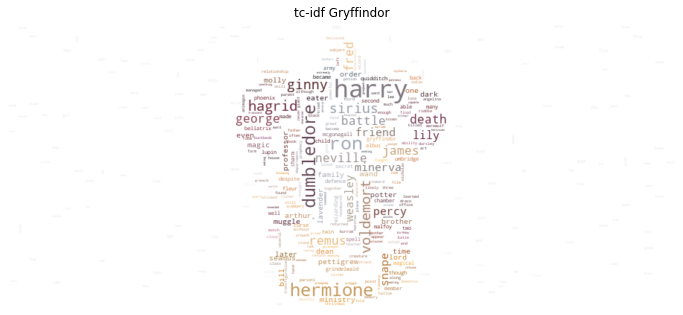

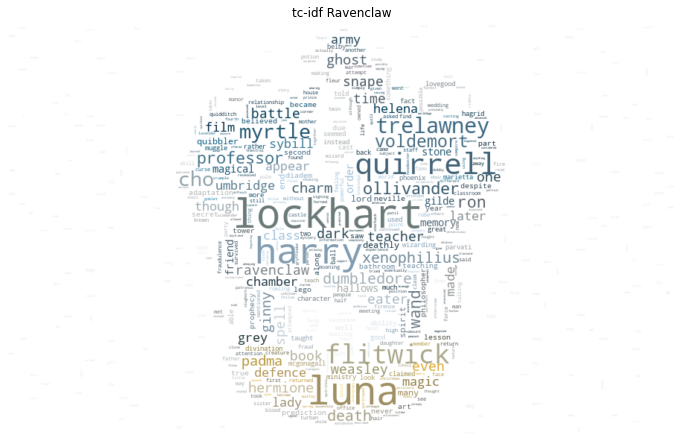

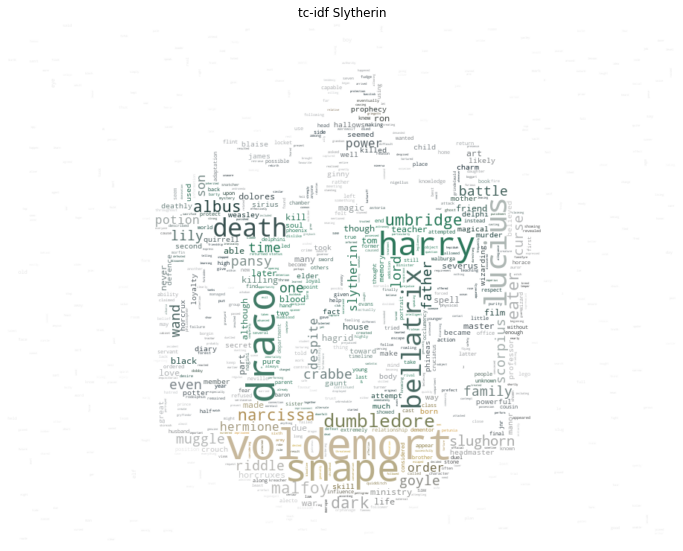

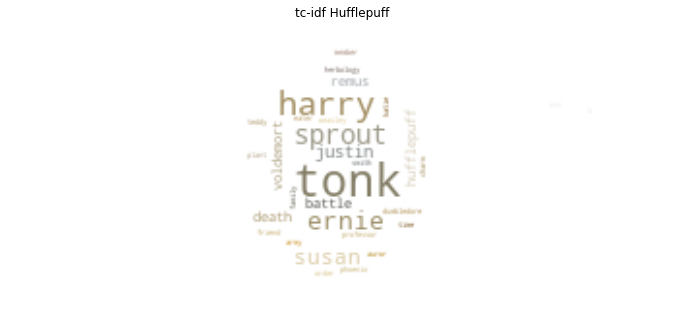

In [23]:
# Step 10: Wordclouds based on the tc-idf scores

for i in range(len(houses)):
    
    # load image which is used for shape and colour of wordcloud
    mask = np.array(Image.open(f'house_images/{houses[i]}.png').convert('RGB'))
    image_colors = ImageColorGenerator(mask)
    
    # Create the wordcloud
    wc = WordCloud(background_color='white', max_words=1000, mask = mask,
                   max_font_size=80, collocations = False).generate(houses_wiki_descriptions[i])

    # Plot each wordcloud
    plt.figure(figsize=(12, 12))
    plt.title('tc-idf ' + houses[i])
    plt.axis("off")
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

#### iv. Discuss the outcome



### 3.2 Project 2: Communities and Wordclouds <a class="anchor" id="s3_2"></a>

### 3.3 Project 3: Sentiment Analysis <a class="anchor" id="s3_3"></a>

#### i. Points of interest

In this section we will look at the characters' sentiment throughout the movies. We will look at the main characters' individual sentiment change throughout the movies, as well as the overall sentiment of each movie. Other ideas, such as the sentiment of each house, and the sentiment of each chapter of ech movie will also be explored. For this part, the data we will be using is the movie scripts.

#### ii. Explain the tool

First of all, as we will be working with the movie script dataset, we need to first prepare the data. We do that the same way as in [3.1 Project 1:WordCloud analysis of houses - steps 1 to 4](#s3_1) where we fix the names, add house data, and clean the text.

#### iii. Applying the tool

In [24]:
# Step 1: Create dataframe from all scripts
path='hp-dataset_script'
df_script = pd.concat([pd.read_csv(path+file) for file in ['\hp1.csv','\hp2.csv','\hp3.csv','\hp4.csv',
                                                   '\hp5.csv','\hp6.csv','\hp7.csv','\hp8.csv']])

# Step 2: Change some names so they match the other dataframe
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ron Weasley'], 'Ronald Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Ginny Weasley'], 'Ginevra Weasley'))
df_script["character"] =df_script["character"].replace(dict.fromkeys(['Tom','Voldemont','Voldemort','Voldermort'],'Tom Riddle'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lavander Brown'], 'Lavender Brown'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Horace Horace Slughorn'], 'Horace Slughorn'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Lily Potter','Lily potter'], 'Lily J. Potter'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Pansy parkinson'], 'Pansy Parkinson'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['The Fat Lady'], 'Fat Lady'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Collin Creevey'], 'Colin Creevey'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Bill Weasley'], 'William Weasley'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['James Potter'], 'James Potter I'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Moaning Myrtle'], 'Myrtle Warren'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Nearly Headless Nick'], 'Nicholas de Mimsy-Porpington'))
df_script["character"] = df_script["character"].replace(dict.fromkeys(['Phineas'], 'Phineas Nigellus Black'))


# Open other df_script and get house data
with open(r"pickle_network_prep.txt", "rb") as fp:   # Unpickling
    df_all = pickle.load(fp)

# Step 3: Add house data to current dataframe
df_house = df_all[['Name', 'House']].rename(columns={'Name': 'character'})
df_script = pd.merge(df_script, df_house, on="character", how='left')


# Step 4: Clean data
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df_script['dialog'])
df_script["clean"] = pd.DataFrame({'clean': brief_cleaning})
df_script['len_clean']=df_script["clean"].apply(len)

df_script.head()                    

movie            chapter  \
0  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
1  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
2  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
3  Harry Potter and the Philosopher's Stone  Doorstep Delivery   
4  Harry Potter and the Philosopher's Stone  Doorstep Delivery   

            character                                             dialog  \
0    Albus Dumbledore  I should have known that you would be here...P...   
1  Minerva McGonagall  Good evening, Professor Dumbledore. Are the ru...   
2    Albus Dumbledore   I'm afraid so, Professor. The good, and the bad.   
3  Minerva McGonagall                                       And the boy?   
4    Albus Dumbledore                            Hagrid is bringing him.   

         House                                              clean  len_clean  
0  Gryffindors  i should have known that you would be here pro...         64  
1  Gryffindors  good evening professor dumbledore are the rumo...         61  
2  Gryffindors      i'm afraid so professor the good and the bad          45  
3  Gryffindors                                       and the boy          12  
4  Gryffindors                            hagrid is bringing him          23

##### part a: Sentiment of characters throughout the movies

In [25]:
characters = list(df_script.character.unique()[df_script.character.value_counts() >= 20])
movies = list(df_script.movie.unique())
df_movies = df_script.groupby('movie')

In [26]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

sentiments_characters = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    vader_sentiment={}
    
    for name in characters:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean>4) and (row.character == name):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[name]=None
        else:
            vader_sentiment[name]=round(np.array(score_list).mean(),3)
    sentiments_characters.append(vader_sentiment)

In [27]:
character_sentiment = {}
for character in characters:
    sentiment = []
    for i in range(len(movies)):
        sentiment.append(sentiments_characters[i][character])
    character_sentiment[character] = sentiment

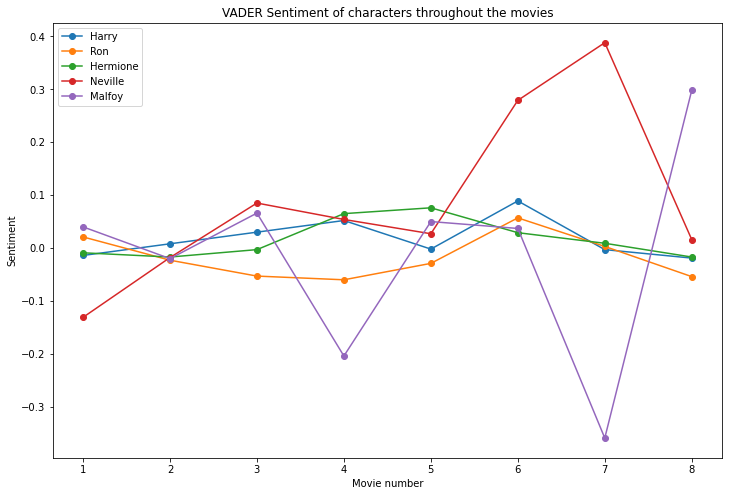

In [28]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Harry Potter'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Ronald Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Hermione Granger'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Neville Longbottom'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Draco Malfoy'], linestyle='-', marker='o')
plt.legend(['Harry', 'Ron', 'Hermione', 'Neville', 'Malfoy'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

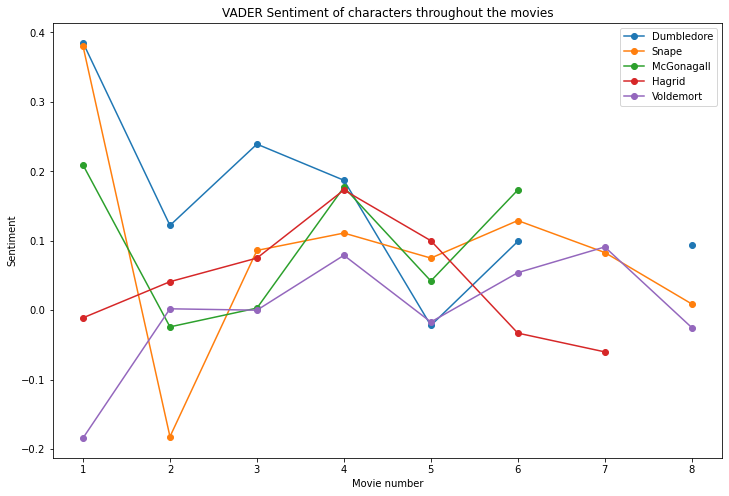

In [29]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Albus Dumbledore'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Severus Snape'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Minerva McGonagall'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Rubeus Hagrid'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Tom Riddle'], linestyle='-', marker='o')
plt.legend(['Dumbledore', 'Snape', 'McGonagall', 'Hagrid', 'Voldemort'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

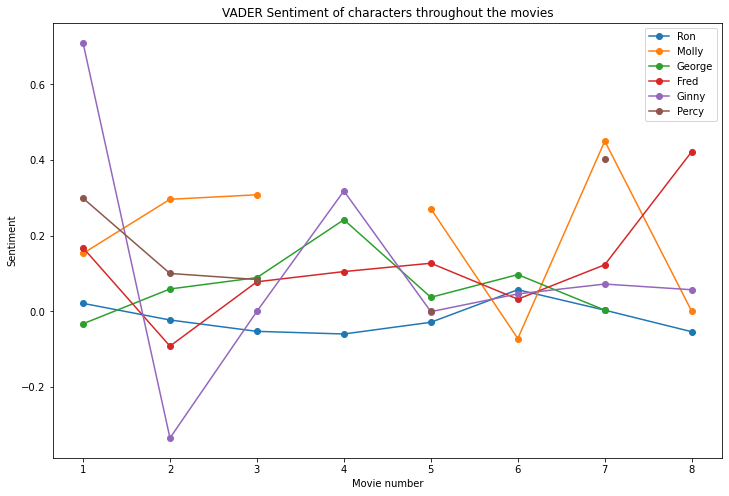

In [30]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), character_sentiment['Ronald Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Molly Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['George Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Fred Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Ginevra Weasley'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), character_sentiment['Percy Weasley'], linestyle='-', marker='o')
plt.legend(['Ron', 'Molly', 'George', 'Fred', 'Ginny', 'Percy'])
plt.title('VADER Sentiment of characters throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

##### part b: Overall sentiment of each movie

In [31]:
# Initialize the sentiment analyser
sia = SentimentIntensityAnalyzer()

sentiments_movies = {}

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    
    score_list=[]
    for index, row in movie_df.iterrows():
        if (type(row.clean) == str) and (row.len_clean>4) and (row.movie == movie):
            score_list.append(sia.polarity_scores(row.clean)["compound"])
    if score_list==[]:
        sentiments_movies[movie] = None
    else:
        sentiments_movies[movie] = round(np.array(score_list).mean(),3)

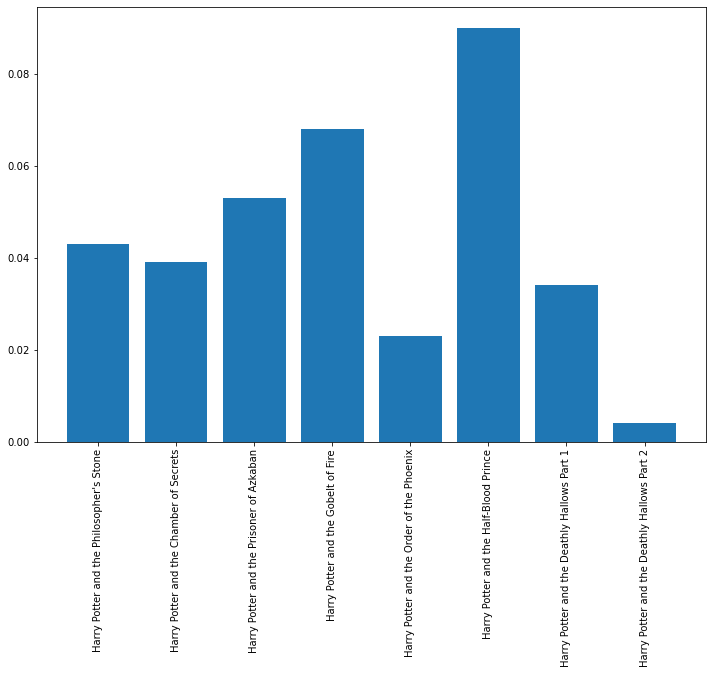

In [32]:
plt.figure(figsize=(12,8))
plt.bar(*zip(*sentiments_movies.items()))
plt.xticks(rotation=90)
plt.show()

#### part c: Sentiment by chapter

In [33]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()

sentiments_chapters = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    chapters = list(movie_df.chapter.unique())
    vader_sentiment={}
    
    for chapter in chapters:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean > 4) and (row.chapter == chapter):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[chapter] = None
        else:
            vader_sentiment[chapter] = round(np.array(score_list).mean(),3)
    sentiments_chapters.append(vader_sentiment)

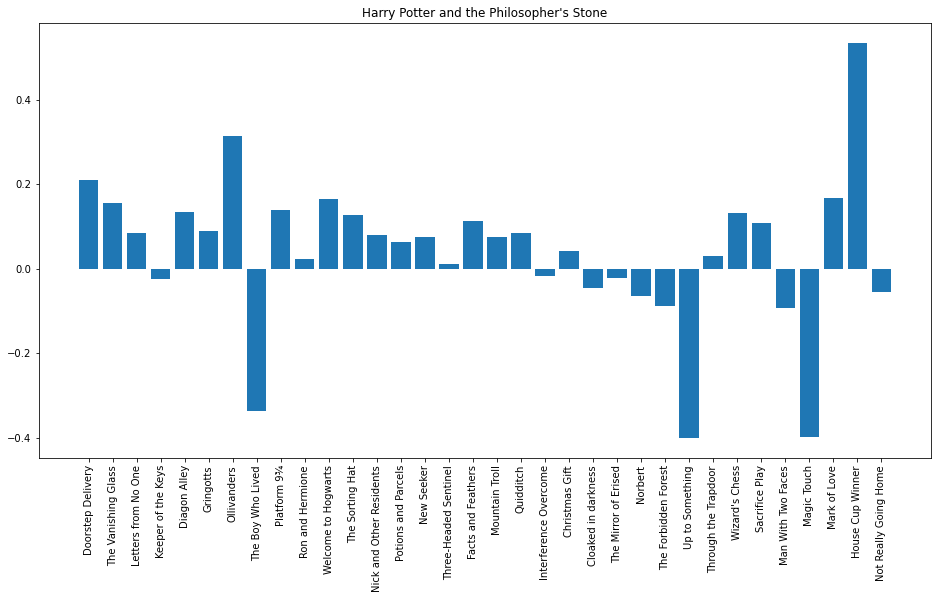

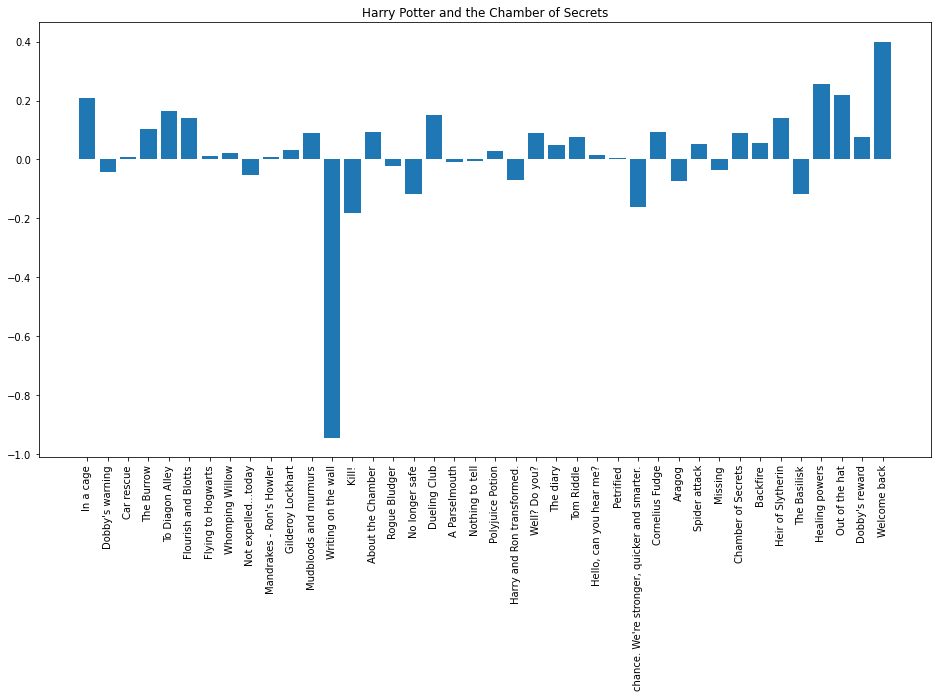

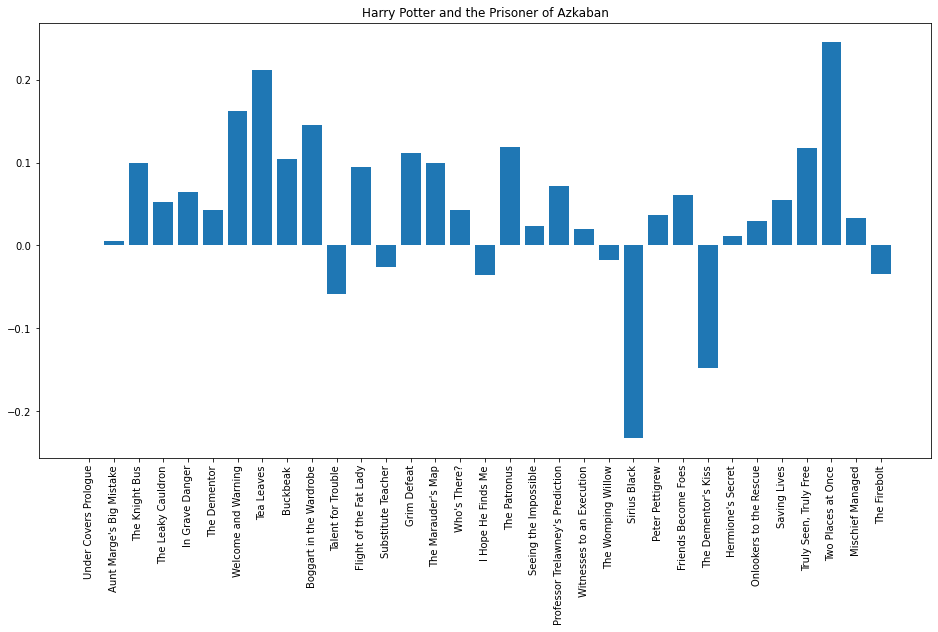

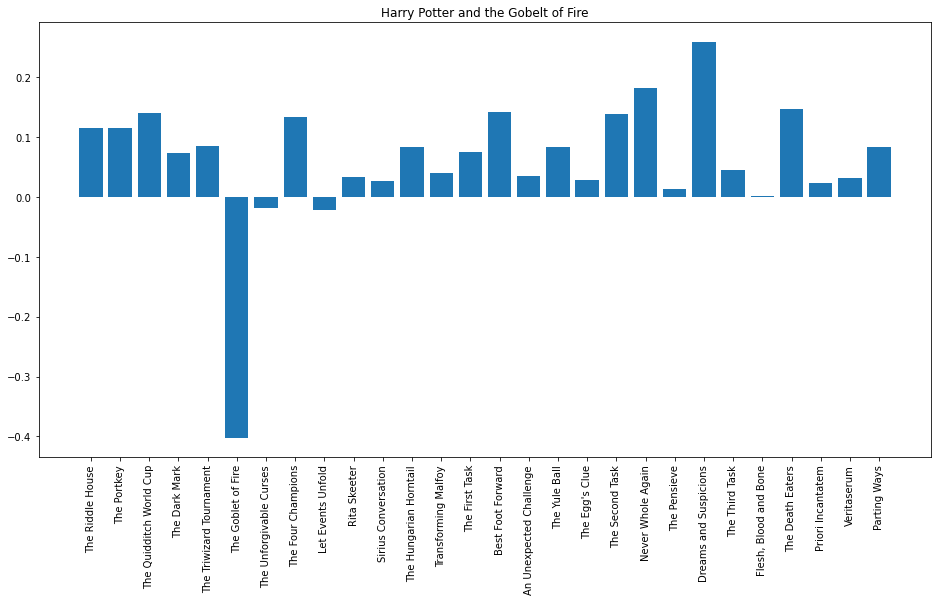

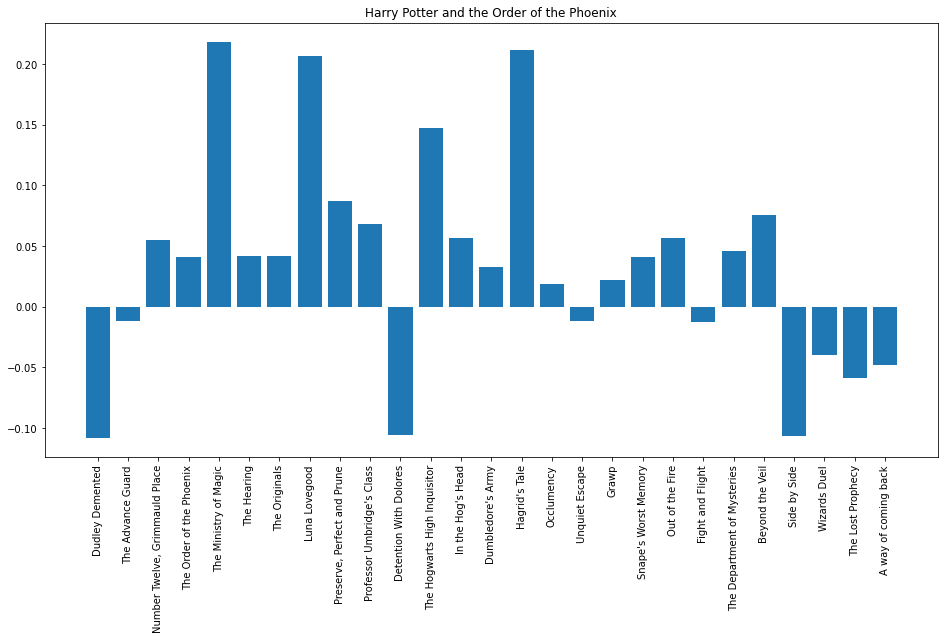

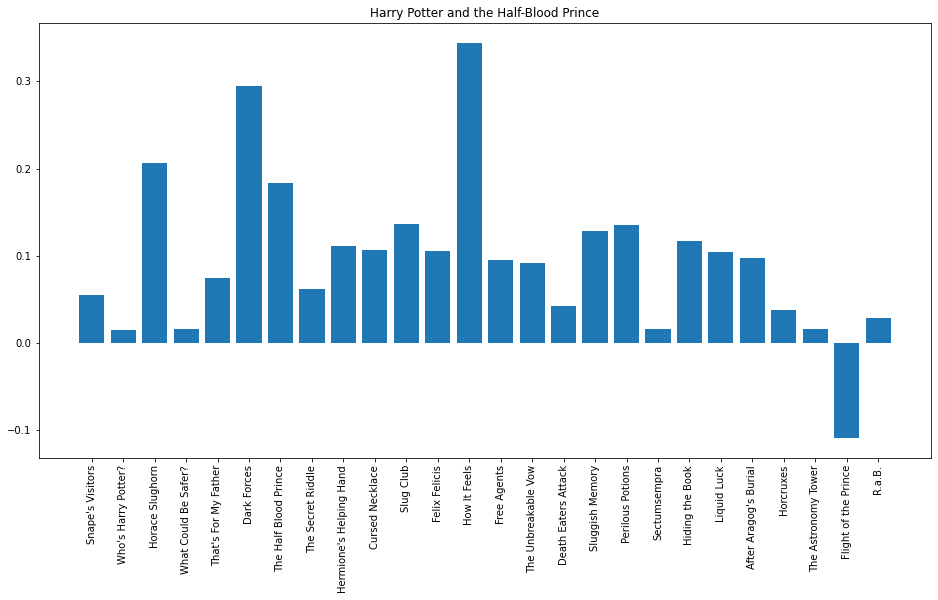

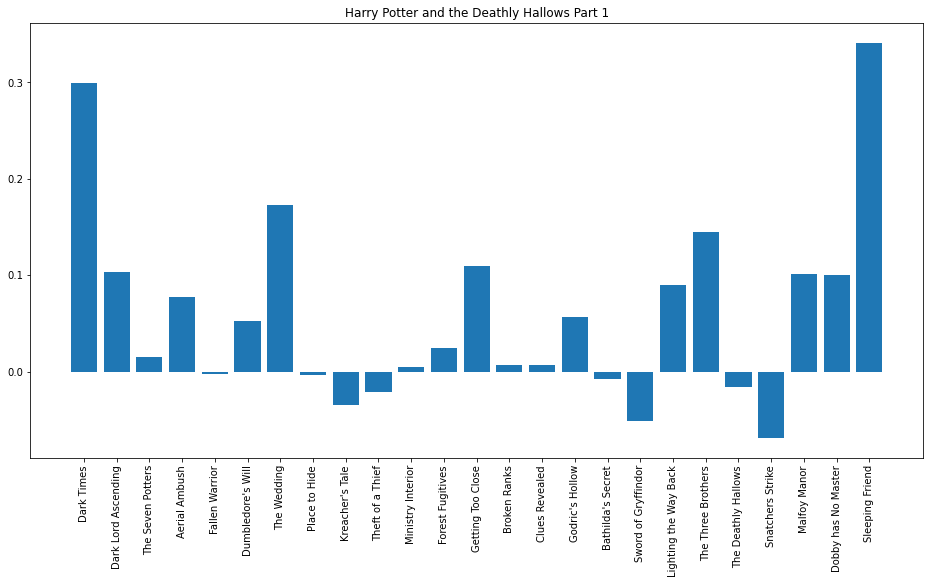

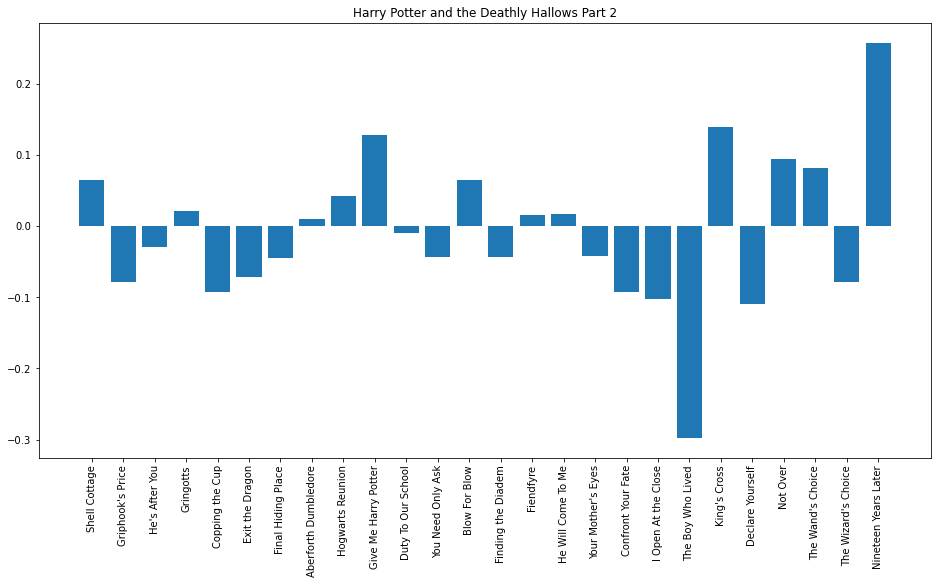

In [34]:
for i in range(len(movies)):
    plt.figure(figsize=((16,8)))
    plt.title(movies[i])
    plt.bar(*zip(*sentiments_chapters[i].items()))
    plt.xticks(rotation=90)
    plt.show()

#### part d: Sentiment analysis of houses

In [35]:
# init the sentiment analyzer
sia = SentimentIntensityAnalyzer()
houses = ['Gryffindors', 'Ravenclaws', 'Slytherins', 'Hufflepuffs']
sentiments_houses = []

for movie in movies:
    
    movie_df = df_movies.get_group(movie)
    vader_sentiment={}
    
    for house in houses:
        
        score_list=[]
        for index, row in movie_df.iterrows():
            if (type(row.clean) == str) and (row.len_clean > 4) and (row.House == house):
                score_list.append(sia.polarity_scores(row.clean)["compound"])
        if score_list==[]:
            vader_sentiment[house] = None
        else:
            vader_sentiment[house] = round(np.array(score_list).mean(),3)
    sentiments_houses.append(vader_sentiment)

In [36]:
house_sentiment = {}
for house in houses:
    sentiment = []
    for i in range(len(movies)):
        sentiment.append(sentiments_houses[i][house])
    house_sentiment[house] = sentiment

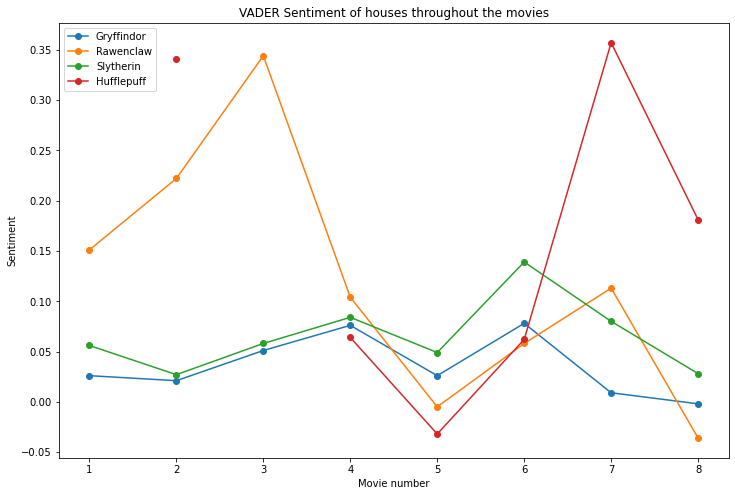

In [37]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,9), house_sentiment['Gryffindors'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Ravenclaws'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Slytherins'], linestyle='-', marker='o')
plt.plot(np.arange(1,9), house_sentiment['Hufflepuffs'], linestyle='-', marker='o')
plt.legend(['Gryffindor', 'Rawenclaw', 'Slytherin', 'Hufflepuff'])
plt.title('VADER Sentiment of houses throughout the movies')
plt.ylabel('Sentiment')
plt.xlabel('Movie number')
plt.show()

### 3.4 Project 4: ... <a class="anchor" id="s3_4"></a>

### 3.5 Project 5: ... <a class="anchor" id="s3_5"></a>

### 3.6 Project 6: ... <a class="anchor" id="s3_6"></a>

## 4. Discussion <a class="anchor" id="c4"></a>

## 5. Contributions <a class="anchor" id="c5"></a>

During this project...

* Jakob (s184419) has focused on ...  

* Marc (s210152) has focused on ...

* Paul (s205569) has focused on ...

However, it is worth noting the great collaboration throughout the course, both in the assignments and in the final project, so that each of us has been aware of and contributed to the project...

## 6. References <a class="anchor" id="c6"></a>

* The main ...